<a href="https://colab.research.google.com/github/a-donat/Data-Science-Portfolio/blob/master/Detecting_Pharyngitis_in_Children_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Pharyngitis in Children with PyCaret

by Annalisa Donat

# Background
"Group A streptococcus (GAS) infection is a major cause of pediatric pharyngitis, and infection with this organism requires appropriate antimicrobial therapy.

There is controversy as to whether physicians can rely on signs and symptoms to select pediatric patients with pharyngitis who should undergo rapid antigen detection testing (RADT) for GAS .

Our objective was to evaluate the validity of signs and symptoms in the selective testing of children with pharyngitis.

Now, let's use machine learning to analyze whether a diagnosis can be made from the child's symptoms and signs.
Can we predict RADT positive?" – Kaggle Data Description

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d yoshifumimiya/pharyngitis

In [ ]:
! unzip '/content/pharyngitis.zip' -d '/content/data'


In [ ]:
! pip install pycaret

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [7]:
phar_df = pd.read_csv("/content/data/pharyngitis.csv")

In [8]:
phar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             676 non-null    int64  
 1   age_y              676 non-null    float64
 2   radt               676 non-null    int64  
 3   pain               644 non-null    float64
 4   swollenadp         672 non-null    float64
 5   tender             648 non-null    float64
 6   tonsillarswelling  658 non-null    float64
 7   exudate            666 non-null    float64
 8   temperature        673 non-null    float64
 9   sudden             669 non-null    float64
 10  cough              664 non-null    float64
 11  rhinorrhea         673 non-null    float64
 12  conjunctivitis     671 non-null    float64
 13  headache           662 non-null    float64
 14  erythema           672 non-null    float64
 15  petechiae          634 non-null    float64
 16  abdopain           667 non

In [10]:
phar_df.isna().sum()

number                0
age_y                 0
radt                  0
pain                 32
swollenadp            4
tender               28
tonsillarswelling    18
exudate              10
temperature           3
sudden                7
cough                12
rhinorrhea            3
conjunctivitis        5
headache             14
erythema              4
petechiae            42
abdopain              9
diarrhea             13
nauseavomit          12
scarlet              10
dtype: int64

In [12]:
phar_df["radt"].value_counts()

0    371
1    305
Name: radt, dtype: int64

In [9]:
phar_df.nunique()

number               676
age_y                100
radt                   2
pain                   2
swollenadp             4
tender                 2
tonsillarswelling      2
exudate                2
temperature           38
sudden                 2
cough                  2
rhinorrhea             2
conjunctivitis         2
headache               2
erythema               2
petechiae              2
abdopain               2
diarrhea               2
nauseavomit            2
scarlet                2
dtype: int64

# II. Preprocessing

In [16]:
phar_train_df, phar_test_df = train_test_split(
    phar_df, test_size=0.20, stratify=phar_df["radt"], random_state=1)


# II.A. Missing Data

In [17]:
for c in list(phar_train_df):
  phar_train_df[c] = phar_train_df[c].fillna(phar_train_df[c].mean())
  phar_test_df[c] = phar_test_df[c].fillna(phar_train_df[c].mean())

In [15]:
phar_df.corr().round(1)

,number,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
number,1.0,0.0,0.1,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1,-0.0,-0.0,-0.1,0.0,-0.0,-0.0,-0.0,-0.0,0.0
age_y,0.0,1.0,0.1,0.2,-0.1,0.1,-0.0,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,0.1,0.0,-0.1,-0.0,-0.0,0.0,-0.2
radt,0.1,0.1,1.0,0.1,0.1,0.2,0.1,-0.1,-0.1,0.0,-0.1,-0.1,-0.0,0.0,0.1,0.3,-0.0,-0.1,0.0,0.3
pain,0.0,0.2,0.1,1.0,-0.0,0.1,0.0,-0.1,-0.2,0.0,-0.0,-0.0,-0.0,-0.1,-0.1,0.0,-0.0,-0.0,-0.0,-0.1
swollenadp,0.0,-0.1,0.1,-0.0,1.0,0.5,-0.1,-0.0,0.1,0.1,-0.1,-0.1,0.0,-0.0,0.1,0.2,0.0,-0.1,0.0,0.1
tender,-0.0,0.1,0.2,0.1,0.5,1.0,0.0,0.0,0.1,-0.0,-0.1,-0.1,0.0,0.1,-0.0,-0.1,0.0,-0.1,0.1,-0.0
tonsillarswelling,0.0,-0.0,0.1,0.0,-0.1,0.0,1.0,0.1,0.1,0.1,-0.0,0.0,-0.0,-0.1,0.1,-0.1,0.0,0.0,-0.0,0.0
exudate,0.0,-0.1,-0.1,-0.1,-0.0,0.0,0.1,1.0,0.2,0.0,-0.1,-0.0,-0.1,-0.1,-0.4,-0.1,0.0,0.0,0.1,-0.0
temperature,0.0,-0.2,-0.1,-0.2,0.1,0.1,0.1,0.2,1.0,0.2,0.0,0.0,-0.0,0.1,-0.1,0.1,0.1,0.0,0.1,-0.0
sudden,-0.0,-0.0,0.0,0.0,0.1,-0.0,0.1,0.0,0.2,1.0,-0.1,-0.1,-0.1,-0.0,0.1,0.2,-0.0,-0.1,-0.0,0.0


# III. Create Models

In [18]:
exp_clf101 = setup(data=phar_train_df, target = "radt", session_id=123) 

,Description,Value
0,Session id,123
1,Target,radt
2,Target type,Binary
3,Original data shape,"(540, 20)"
4,Transformed data shape,"(540, 20)"
5,Transformed train set shape,"(378, 20)"
6,Transformed test set shape,"(162, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7225,0.0000,0.6082,0.7398,0.6589,0.4304,0.4419,0.0480
lda,Linear Discriminant Analysis,0.7225,0.7135,0.6082,0.7398,0.6589,0.4304,0.4419,0.0610
lr,Logistic Regression,0.7092,0.7230,0.6141,0.7129,0.6527,0.4056,0.4142,0.7210
nb,Naive Bayes,0.7066,0.7151,0.5618,0.7460,0.6272,0.3956,0.4147,0.0560
gbc,Gradient Boosting Classifier,0.6801,0.6893,0.6190,0.6517,0.6299,0.3491,0.3527,0.3030
qda,Quadratic Discriminant Analysis,0.6643,0.6986,0.5386,0.6637,0.5829,0.3111,0.3210,0.0820
rf,Random Forest Classifier,0.6642,0.6904,0.5438,0.6596,0.5879,0.3110,0.3209,0.4540
ada,Ada Boost Classifier,0.6615,0.6766,0.5605,0.6490,0.5939,0.3069,0.3142,0.4760
xgboost,Extreme Gradient Boosting,0.6588,0.6939,0.5840,0.6316,0.6035,0.3052,0.3080,0.2640
lightgbm,Light Gradient Boosting Machine,0.6535,0.7242,0.5729,0.6288,0.5959,0.2944,0.2975,0.3340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [20]:
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8158,0.0000,0.7059,0.8571,0.7742,0.6211,0.6294
2,0.6842,0.0000,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
4,0.6579,0.0000,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6842,0.0000,0.6471,0.6471,0.6471,0.3613,0.3613
6,0.6053,0.0000,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.8108,0.0000,0.7647,0.8125,0.7879,0.6174,0.6184


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8158,0.0000,0.7059,0.8571,0.7742,0.6211,0.6294
2,0.6842,0.0000,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
4,0.6579,0.0000,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6842,0.0000,0.6471,0.6471,0.6471,0.3613,0.3613
6,0.6053,0.0000,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.8108,0.0000,0.7647,0.8125,0.7879,0.6174,0.6184


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
lda = create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.7647,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8158,0.8711,0.7059,0.8571,0.7742,0.6211,0.6294
2,0.6842,0.5434,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7895,0.7339,0.7647,0.7647,0.7647,0.5742,0.5742
4,0.6579,0.6162,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6842,0.6891,0.6471,0.6471,0.6471,0.3613,0.3613
6,0.6053,0.6443,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.6167,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.8108,0.8147,0.7647,0.8125,0.7879,0.6174,0.6184


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7703,0.8235,0.6667,0.7368,0.4795,0.4902
1,0.7895,0.8796,0.7059,0.8000,0.7500,0.5694,0.5727
2,0.6579,0.5826,0.3529,0.7500,0.4800,0.2714,0.3143
3,0.7368,0.7535,0.7059,0.7059,0.7059,0.4678,0.4678
4,0.6316,0.6190,0.5294,0.6000,0.5625,0.2465,0.2479
5,0.6579,0.7031,0.5882,0.6250,0.6061,0.3042,0.3047
6,0.6053,0.6387,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6842,0.6972,0.6111,0.6875,0.6471,0.3631,0.3652
8,0.7297,0.7441,0.7059,0.7059,0.7059,0.4559,0.4559


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.6863,0.7059,0.6316,0.6667,0.3684,0.3705
1,0.6842,0.6751,0.5882,0.6667,0.6250,0.3541,0.3562
2,0.6053,0.5868,0.4118,0.5833,0.4828,0.1787,0.1858
3,0.4474,0.4552,0.5294,0.4091,0.4615,-0.0872,-0.0903
4,0.5263,0.5154,0.4118,0.4667,0.4375,0.0312,0.0313
5,0.5789,0.5854,0.6471,0.5238,0.5789,0.1671,0.1709
6,0.4474,0.4328,0.2941,0.3571,0.3226,-0.1368,-0.1386
7,0.5000,0.5028,0.5556,0.4762,0.5128,0.0055,0.0056
8,0.5405,0.5529,0.7059,0.5000,0.5854,0.1027,0.1105


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7311,0.6471,0.6875,0.6667,0.4113,0.4119
1,0.8421,0.7927,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6316,0.5686,0.4118,0.6364,0.5000,0.2290,0.2426
3,0.5789,0.5504,0.5882,0.5263,0.5556,0.1579,0.1588
4,0.6579,0.6583,0.5882,0.6250,0.6061,0.3042,0.3047
5,0.7105,0.7031,0.5882,0.7143,0.6452,0.4046,0.4100
6,0.6053,0.5714,0.4118,0.5833,0.4828,0.1787,0.1858
7,0.5789,0.5694,0.5000,0.5625,0.5294,0.1508,0.1517
8,0.6757,0.6515,0.4706,0.7273,0.5714,0.3293,0.3495


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [27]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [28]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.7871,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8421,0.8908,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6842,0.5742,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7632,0.7423,0.7647,0.7222,0.7429,0.5237,0.5244
4,0.6316,0.6246,0.4706,0.6154,0.5333,0.2378,0.2437
5,0.6316,0.6891,0.5882,0.5882,0.5882,0.2549,0.2549
6,0.6053,0.6583,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6316,0.6167,0.6111,0.6111,0.6111,0.2611,0.2611
8,0.7568,0.8088,0.7647,0.7222,0.7429,0.5124,0.5132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.7843,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8421,0.8908,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6842,0.5602,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7632,0.7395,0.7647,0.7222,0.7429,0.5237,0.5244
4,0.6316,0.6275,0.4706,0.6154,0.5333,0.2378,0.2437
5,0.6579,0.6751,0.6471,0.6111,0.6286,0.3120,0.3124
6,0.6053,0.6555,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6316,0.6056,0.6111,0.6111,0.6111,0.2611,0.2611
8,0.7568,0.8147,0.7647,0.7222,0.7429,0.5124,0.5132


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [30]:
nb = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7759,0.7059,0.6667,0.6857,0.4178,0.4184
1,0.7895,0.8627,0.5882,0.9091,0.7143,0.5594,0.5927
2,0.6579,0.5854,0.2941,0.8333,0.4348,0.2627,0.3361
3,0.7105,0.7227,0.7059,0.6667,0.6857,0.4178,0.4184
4,0.6842,0.5854,0.5882,0.6667,0.6250,0.3541,0.3562
5,0.6579,0.7059,0.5882,0.6250,0.6061,0.3042,0.3047
6,0.6579,0.5910,0.4118,0.7000,0.5185,0.2799,0.3036
7,0.6842,0.7306,0.5000,0.7500,0.6000,0.3559,0.3760
8,0.7297,0.7882,0.6471,0.7333,0.6875,0.4510,0.4538


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7759,0.7059,0.6667,0.6857,0.4178,0.4184
1,0.7895,0.8627,0.5882,0.9091,0.7143,0.5594,0.5927
2,0.6579,0.5854,0.2941,0.8333,0.4348,0.2627,0.3361
3,0.7105,0.7227,0.7059,0.6667,0.6857,0.4178,0.4184
4,0.6842,0.5854,0.5882,0.6667,0.6250,0.3541,0.3562
5,0.6579,0.7059,0.5882,0.6250,0.6061,0.3042,0.3047
6,0.6579,0.5882,0.4118,0.7000,0.5185,0.2799,0.3036
7,0.6842,0.7306,0.5000,0.7500,0.6000,0.3559,0.3760
8,0.7297,0.7882,0.6471,0.7333,0.6875,0.4510,0.4538


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.8207,0.7059,0.7059,0.7059,0.4678,0.4678
1,0.7105,0.7479,0.7059,0.6667,0.6857,0.4178,0.4184
2,0.6579,0.5490,0.4118,0.7000,0.5185,0.2799,0.3036
3,0.6842,0.6303,0.6471,0.6471,0.6471,0.3613,0.3613
4,0.4737,0.5266,0.3529,0.4000,0.3750,-0.0765,-0.0769
5,0.7632,0.7843,0.7647,0.7222,0.7429,0.5237,0.5244
6,0.6316,0.6975,0.4706,0.6154,0.5333,0.2378,0.2437
7,0.7105,0.6833,0.7778,0.6667,0.7179,0.4242,0.4296
8,0.7027,0.6882,0.6471,0.6875,0.6667,0.3988,0.3994


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7675,0.7059,0.7059,0.7059,0.4678,0.4678
1,0.7895,0.9076,0.6471,0.8462,0.7333,0.5645,0.5783
2,0.6316,0.5742,0.2941,0.7143,0.4167,0.2107,0.2551
3,0.7105,0.6639,0.5294,0.7500,0.6207,0.3977,0.4135
4,0.5789,0.6415,0.3529,0.5455,0.4286,0.1188,0.1259
5,0.6842,0.6919,0.5882,0.6667,0.6250,0.3541,0.3562
6,0.5789,0.6527,0.3529,0.5455,0.4286,0.1188,0.1259
7,0.6842,0.7139,0.5556,0.7143,0.6250,0.3596,0.3680
8,0.7027,0.7382,0.5882,0.7143,0.6452,0.3934,0.3989


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
qda = create_model("qda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7773,0.7059,0.7059,0.7059,0.4678,0.4678
1,0.7368,0.8011,0.6471,0.7333,0.6875,0.4618,0.4645
2,0.6053,0.6050,0.2353,0.6667,0.3478,0.1493,0.1910
3,0.6579,0.6611,0.5294,0.6429,0.5806,0.2963,0.3003
4,0.6316,0.5910,0.5882,0.5882,0.5882,0.2549,0.2549
5,0.6053,0.6807,0.5882,0.5556,0.5714,0.2061,0.2064
6,0.6053,0.6190,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6316,0.6889,0.4444,0.6667,0.5333,0.2486,0.2626
8,0.7297,0.8118,0.7059,0.7059,0.7059,0.4559,0.4559


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
qda_tuned = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7227,0.7059,0.6667,0.6857,0.4178,0.4184
1,0.8158,0.8739,0.7059,0.8571,0.7742,0.6211,0.6294
2,0.6579,0.6695,0.3529,0.7500,0.4800,0.2714,0.3143
3,0.6053,0.6246,0.5294,0.5625,0.5455,0.1972,0.1975
4,0.5263,0.5658,0.4118,0.4667,0.4375,0.0312,0.0313
5,0.6316,0.6246,0.5294,0.6000,0.5625,0.2465,0.2479
6,0.6316,0.6723,0.5294,0.6000,0.5625,0.2465,0.2479
7,0.7105,0.6694,0.6111,0.7333,0.6667,0.4146,0.4200
8,0.7568,0.7618,0.7647,0.7222,0.7429,0.5124,0.5132


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [36]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7941,0.8235,0.6364,0.7179,0.4305,0.4457
1,0.7105,0.7927,0.5294,0.7500,0.6207,0.3977,0.4135
2,0.6316,0.5798,0.3529,0.6667,0.4615,0.2199,0.2457
3,0.6316,0.6779,0.5294,0.6000,0.5625,0.2465,0.2479
4,0.5526,0.5938,0.4118,0.5000,0.4516,0.0798,0.0808
5,0.7632,0.6583,0.7059,0.7500,0.7273,0.5183,0.5191
6,0.6053,0.6555,0.4118,0.5833,0.4828,0.1787,0.1858
7,0.6579,0.6458,0.5556,0.6667,0.6061,0.3081,0.3121
8,0.6486,0.7441,0.5882,0.6250,0.6061,0.2895,0.2899


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.8123,0.8235,0.6087,0.7000,0.3821,0.4018
1,0.8158,0.8739,0.6471,0.9167,0.7586,0.6167,0.6412
2,0.6579,0.6134,0.4118,0.7000,0.5185,0.2799,0.3036
3,0.6316,0.6863,0.6471,0.5789,0.6111,0.2632,0.2646
4,0.6316,0.6387,0.5294,0.6000,0.5625,0.2465,0.2479
5,0.6579,0.7171,0.6471,0.6111,0.6286,0.3120,0.3124
6,0.6842,0.6863,0.5294,0.6923,0.6000,0.3467,0.3552
7,0.6579,0.6917,0.6667,0.6316,0.6486,0.3158,0.3162
8,0.7297,0.7382,0.5882,0.7692,0.6667,0.4461,0.4575


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


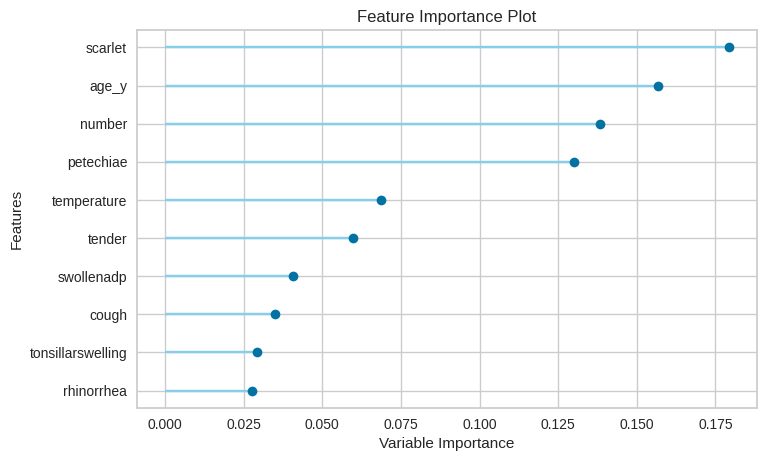

In [55]:
plot_model(tuned_rf, plot='feature')

In [38]:
ada = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.8207,0.8235,0.7778,0.8000,0.6295,0.6304
1,0.6842,0.7255,0.4118,0.7778,0.5385,0.3314,0.3702
2,0.6053,0.6275,0.4118,0.5833,0.4828,0.1787,0.1858
3,0.5789,0.5658,0.4706,0.5333,0.5000,0.1388,0.1396
4,0.5789,0.6106,0.4118,0.5385,0.4667,0.1289,0.1321
5,0.6316,0.6499,0.5882,0.5882,0.5882,0.2549,0.2549
6,0.7105,0.7283,0.5294,0.7500,0.6207,0.3977,0.4135
7,0.6579,0.6111,0.7222,0.6190,0.6667,0.3196,0.3236
8,0.6216,0.6647,0.5882,0.5882,0.5882,0.2382,0.2382


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7632,0.7521,0.8235,0.7000,0.7568,0.5289,0.5356
1,0.7632,0.8291,0.4706,1.0000,0.6400,0.4956,0.5739
2,0.6579,0.6471,0.3529,0.7500,0.4800,0.2714,0.3143
3,0.6053,0.6625,0.5294,0.5625,0.5455,0.1972,0.1975
4,0.6053,0.6289,0.4118,0.5833,0.4828,0.1787,0.1858
5,0.6842,0.7591,0.7059,0.6316,0.6667,0.3684,0.3705
6,0.7368,0.6933,0.5882,0.7692,0.6667,0.4556,0.4668
7,0.6316,0.6944,0.5000,0.6429,0.5625,0.2528,0.2588
8,0.6757,0.6647,0.4706,0.7273,0.5714,0.3293,0.3495


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
xgb = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7105,0.7927,0.7059,0.6667,0.6857,0.4178,0.4184
1,0.7105,0.8207,0.5882,0.7143,0.6452,0.4046,0.4100
2,0.6316,0.5910,0.4118,0.6364,0.5000,0.2290,0.2426
3,0.6842,0.6443,0.5882,0.6667,0.6250,0.3541,0.3562
4,0.4737,0.5742,0.3529,0.4000,0.3750,-0.0765,-0.0769
5,0.6842,0.7003,0.6471,0.6471,0.6471,0.3613,0.3613
6,0.6579,0.6639,0.5882,0.6250,0.6061,0.3042,0.3047
7,0.6842,0.6750,0.7222,0.6500,0.6842,0.3702,0.3722
8,0.7027,0.7235,0.7059,0.6667,0.6857,0.4041,0.4047


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tuned_xgb = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.7535,0.8235,0.6087,0.7000,0.3821,0.4018
1,0.7632,0.8347,0.9412,0.6667,0.7805,0.5391,0.5775
2,0.5000,0.5798,0.5294,0.4500,0.4865,0.0055,0.0056
3,0.5789,0.6639,0.7647,0.5200,0.6190,0.1850,0.2026
4,0.4737,0.5350,0.6471,0.4400,0.5238,-0.0188,-0.0206
5,0.6053,0.6667,0.7647,0.5417,0.6341,0.2318,0.2483
6,0.6053,0.6723,0.6471,0.5500,0.5946,0.2149,0.2176
7,0.5789,0.7139,0.7778,0.5385,0.6364,0.1739,0.1910
8,0.5946,0.7176,0.9412,0.5333,0.6809,0.2281,0.3069


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.6835,0.5294,0.5294,0.5294,0.1485,0.1485
1,0.5526,0.5462,0.2941,0.5000,0.3704,0.0583,0.0633
2,0.5526,0.5392,0.4706,0.5000,0.4848,0.0901,0.0903
3,0.5263,0.5154,0.5882,0.4762,0.5263,0.0630,0.0644
4,0.4474,0.4916,0.1765,0.3000,0.2222,-0.1633,-0.1771
5,0.4737,0.5098,0.3529,0.4000,0.3750,-0.0765,-0.0769
6,0.6053,0.5574,0.2353,0.6667,0.3478,0.1493,0.1910
7,0.4474,0.4792,0.3889,0.4118,0.4000,-0.1114,-0.1116
8,0.5946,0.6412,0.5294,0.5625,0.5455,0.1802,0.1805


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.6471,0.4118,0.7778,0.5385,0.3314,0.3702
1,0.5789,0.5742,0.1765,0.6000,0.2727,0.0871,0.1195
2,0.6579,0.5910,0.4118,0.7000,0.5185,0.2799,0.3036
3,0.6053,0.5350,0.3529,0.6000,0.4444,0.1691,0.1834
4,0.5263,0.4874,0.1176,0.4000,0.1818,-0.0270,-0.0371
5,0.6579,0.6246,0.4706,0.6667,0.5517,0.2882,0.2996
6,0.6053,0.5728,0.1765,0.7500,0.2857,0.1390,0.2088
7,0.5526,0.5250,0.5000,0.5294,0.5143,0.1003,0.1004
8,0.6757,0.6471,0.4118,0.7778,0.5385,0.3232,0.3621


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [47]:
blender = blend_models([tuned_ridge, tuned_lr, tuned_nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8421,0.0000,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6842,0.0000,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7632,0.0000,0.7647,0.7222,0.7429,0.5237,0.5244
4,0.6579,0.0000,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6579,0.0000,0.6471,0.6111,0.6286,0.3120,0.3124
6,0.6053,0.0000,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.7838,0.0000,0.7647,0.7647,0.7647,0.5647,0.5647


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
tuned_blender = tune_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8421,0.0000,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6842,0.0000,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7632,0.0000,0.7647,0.7222,0.7429,0.5237,0.5244
4,0.6579,0.0000,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6579,0.0000,0.6471,0.6111,0.6286,0.3120,0.3124
6,0.6053,0.0000,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.7838,0.0000,0.7647,0.7647,0.7647,0.5647,0.5647


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
blender2 = blend_models([tuned_ridge, tuned_lr, tuned_nb, tuned_knn, tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8158,0.0000,0.6471,0.9167,0.7586,0.6167,0.6412
2,0.6579,0.0000,0.3529,0.7500,0.4800,0.2714,0.3143
3,0.7632,0.0000,0.7059,0.7500,0.7273,0.5183,0.5191
4,0.6842,0.0000,0.5294,0.6923,0.6000,0.3467,0.3552
5,0.6579,0.0000,0.6471,0.6111,0.6286,0.3120,0.3124
6,0.6316,0.0000,0.4706,0.6154,0.5333,0.2378,0.2437
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.7838,0.0000,0.7059,0.8000,0.7500,0.5608,0.5642


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [50]:
tuned_blender2 = tune_model(blender2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
1,0.8421,0.0000,0.7059,0.9231,0.8000,0.6734,0.6899
2,0.6842,0.0000,0.4118,0.7778,0.5385,0.3314,0.3702
3,0.7895,0.0000,0.7647,0.7647,0.7647,0.5742,0.5742
4,0.6579,0.0000,0.4706,0.6667,0.5517,0.2882,0.2996
5,0.6842,0.0000,0.6471,0.6471,0.6471,0.3613,0.3613
6,0.6053,0.0000,0.4706,0.5714,0.5161,0.1880,0.1906
7,0.6579,0.0000,0.6111,0.6471,0.6286,0.3120,0.3124
8,0.8108,0.0000,0.7647,0.8125,0.7879,0.6174,0.6184


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
week_blend = blend_models([dt, knn])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.7451,0.7059,0.6316,0.6667,0.3684,0.3705
1,0.6579,0.6891,0.5294,0.6429,0.5806,0.2963,0.3003
2,0.6053,0.5700,0.4118,0.5833,0.4828,0.1787,0.1858
3,0.4737,0.4734,0.5294,0.4286,0.4737,-0.0411,-0.0420
4,0.5000,0.5224,0.3529,0.4286,0.3871,-0.0285,-0.0289
5,0.6053,0.5924,0.6471,0.5500,0.5946,0.2149,0.2176
6,0.4474,0.4566,0.2941,0.3571,0.3226,-0.1368,-0.1386
7,0.5000,0.4833,0.5000,0.4737,0.4865,0.0000,0.0000
8,0.5676,0.6309,0.7059,0.5217,0.6000,0.1519,0.1602


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [52]:
tuned_week_blend = tune_model(week_blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7395,0.7059,0.7059,0.7059,0.4678,0.4678
1,0.6053,0.6415,0.4118,0.5833,0.4828,0.1787,0.1858
2,0.6316,0.5812,0.5294,0.6000,0.5625,0.2465,0.2479
3,0.4737,0.5014,0.5882,0.4348,0.5000,-0.0298,-0.0313
4,0.5526,0.5070,0.3529,0.5000,0.4138,0.0692,0.0719
5,0.6053,0.5714,0.6471,0.5500,0.5946,0.2149,0.2176
6,0.5789,0.4930,0.4118,0.5385,0.4667,0.1289,0.1321
7,0.5526,0.4931,0.5556,0.5263,0.5405,0.1053,0.1054
8,0.5946,0.6515,0.6471,0.5500,0.5946,0.1945,0.1971


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**the best estimator is tuned_blender2**

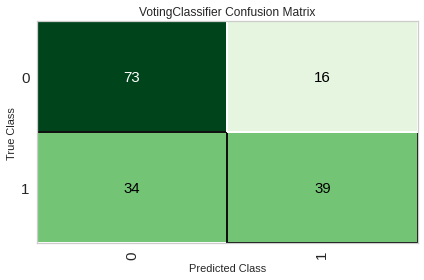

In [56]:
plot_model(tuned_blender2, plot = 'confusion_matrix')

In [58]:
predict_model(tuned_blender2);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6914,0.6772,0.5342,0.7091,0.6094,0.3625,0.3724


In [59]:
final_tuned_blender2 = finalize_model(tuned_blender2)

In [60]:
print(final_tuned_blender2)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['number', 'age_y', 'pain',
                                             'swollenadp', 'tender',
                                             'tonsillarswelling', 'exudate',
                                             'temperature', 'sudden', 'cough',
                                             'rhinorrhea', 'conjunctivitis',
                                             'headache', 'erythema',
                                             'petechiae', 'abdopain',
                                             'diarrhea', 'nauseavomit',
                                             'scarlet'],
                                    transformer=Si...
                                                                      min_impurity_decrease=0.0002,
                                                                  

# IV. Performance on Test Data

In [61]:
final_tuned_blender2

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['number', 'age_y', 'pain',
                                             'swollenadp', 'tender',
                                             'tonsillarswelling', 'exudate',
                                             'temperature', 'sudden', 'cough',
                                             'rhinorrhea', 'conjunctivitis',
                                             'headache', 'erythema',
                                             'petechiae', 'abdopain',
                                             'diarrhea', 'nauseavomit',
                                             'scarlet'],
                                    transformer=Si...
                                                                      min_impurity_decrease=0.0002,
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=9,
                                                                      min_weight_fraction_leaf=0.0,
                                                                      n_estimators=130,
                                                                      n_jobs=-1,
                                                                      oob_score=False,
                                                                      random_state=123,
                                                                      verbose=0,
                                                                      warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='hard',
                                  weights=[0.9600000000000001, 0.68,
                                           0.36000000000000004,
                                           0.35000000000000003,
                                           0.15000000000000002]))],
         verbose=False)

In [62]:
test_predictions = predict_model(final_tuned_blender2, data=phar_test_df)
test_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6912,0.6848,0.6230,0.6667,0.6441,0.3719,0.3726


,number,age_y,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,...,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet,radt,prediction_label
387,2512,6.2,1.0,0.0,0.0,1.0,1.0,38.5,1.0,0.0,...,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1,1
98,2115,6.8,1.0,0.0,0.0,1.0,0.0,39.0,1.0,1.0,...,0.0,0.0,1.0,0.183071,1.0,1.0,0.0,1.0,1,1
231,2322,7.9,1.0,2.0,1.0,1.0,0.0,38.5,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1,1
571,3147,4.2,1.0,0.0,0.0,1.0,0.0,39.0,0.0,1.0,...,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0,0
13,2014,5.7,1.0,3.0,1.0,1.0,0.0,38.0,1.0,1.0,...,0.0,0.0,1.0,1.000000,1.0,0.0,1.0,0.0,1,1
